In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
% matplotlib inline

In [6]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

D:\systemEnvironment\Anaconda3\envs\dsLL\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


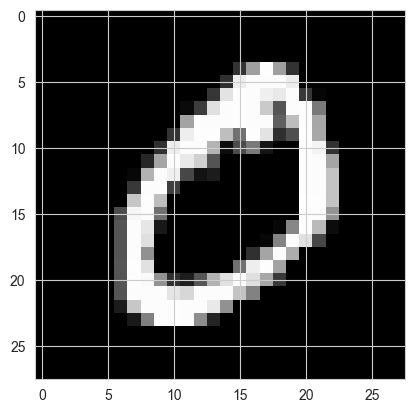

In [7]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')
plt.show()

In [9]:
# 将 pixel_values 转换为 NumPy 数组
pixel_values = pixel_values.values

# 然后进行切片操作
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [11]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df

,x,y,targets
0,20.515184,-11.026083,5.0
1,57.560905,0.121864,0.0
2,-0.679077,-54.268143,4.0
3,-41.528664,11.559952,1.0
4,-10.032307,-33.632420,9.0
...,...,...,...
2995,-35.470184,-24.492340,7.0
2996,52.467827,-3.201818,0.0
2997,-30.010117,-13.070750,9.0
2998,-29.661884,45.717960,1.0


In [12]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

TypeError: __init__() got an unexpected keyword argument 'size'